# Decision Trees - IIC2613

Code taken from: https://towardsdatascience.com/visualizing-decision-trees-in-jupyter-notebook-with-python-and-graphviz-78703230a7b1

## Let's create some datasets

In [ ]:
#@title Parámetros { run: "auto" }
dataset = 'breast_cancer' #@param ["iris", "wine", "breast_cancer"]
metric = 'gini' #@param ["gini", "entropy"]

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split

ds_names= {'iris': datasets.load_iris,
           'wine': datasets.load_wine,
           'breast_cancer':datasets.load_breast_cancer}
ds = ds_names[dataset]()
X = pd.DataFrame(ds.data, columns=ds.feature_names)
y = ds.target

# Divide into train and test splits
# We could repeat this on the test set to get val split as well
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Creating our Decision Tree!

In [ ]:
model = DecisionTreeClassifier(criterion=metric)
model.fit(X_train,y_train)                                    # SKLearn magic!
export_graphviz(model, 
                f'{dataset}.dot',                 # Output filename 
                feature_names = ds.feature_names, # Attribute names
                class_names=ds.target_names)      # Class names

# Evaluation!
predictions = model.predict(X_train)
correct = (predictions == y_train).sum()
acc = correct/y_train.shape[0]
print(f"Train Accuracy: {100*acc:.2f}%")
predictions = model.predict(X_test)
correct = (predictions == y_test).sum()
acc = correct/y_test.shape[0]

print(f"Test Accuracy: {100*acc:.2f}%")

Train Accuracy: 100.00%
Test Accuracy: 94.74%


## Let's graph our tree!

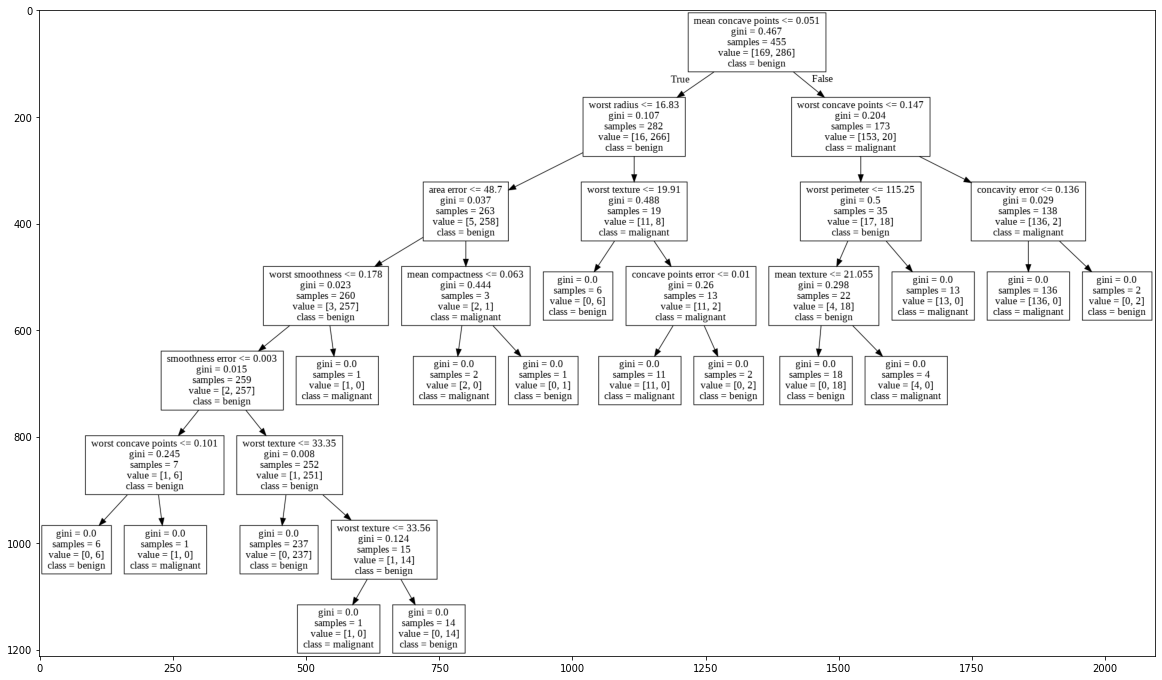

In [ ]:
! dot -Tpng  '{dataset}.dot' -o '{dataset}'.png
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread(f'{dataset}.png')
plt.figure(figsize = (20, 20))
plt.imshow(img)